In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

**Question 1**
1. For a fixed value of IQ and GPA females earn more since beta3 is positive. 
Hence (a) - false (b) - true
For a fixed value of IQ and GPA and GPA is high enough then males earn more, because when GPA is high enough interaction term of IQ and GPA will start to dominate over(which is negative). 
(c) - true, (d) - false
2. Starting salary = 50 + 20*GPA + 0.07*IQ + 35*Gender + 0.01*GPA*IQ - 10*GPA*Gender
   IQ = 110, GPA = 4.0, Gender = 1.
   Putting that in the equation we get
   Starting salary = 137.1k dollars
3. True, coefficient is an indictator interaction effect.

**Question 2**

Value of alpha 39.93586102117047

Value of beta -0.15784473335365354
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 19 Dec 2025   Prob (F-statistic):           7.03e-81
Time:                        12:37:40   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------

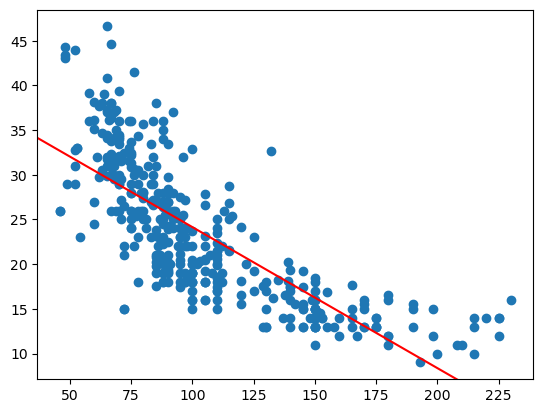

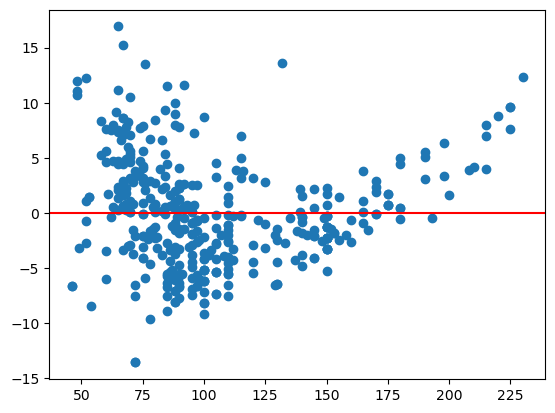

                    0          1
const       38.525212  41.346510
horsepower  -0.170517  -0.145172
        mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  24.467077  0.251262      23.973079      24.961075     14.809396   

   obs_ci_upper  
0     34.124758  


In [19]:
#Reading the data
df = pd.read_csv('Auto.csv')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df = df.dropna()
#Generating a regression.
Y = df['mpg']
X = df['horsepower']
X_with_constant = sm.add_constant(X)

model = sm.OLS(Y, X_with_constant).fit()

#mpg = beta*horsepower + alpha + residual

alpha = model.params.iloc[0]
beta = model.params.iloc[1]

print("Value of alpha", alpha)
print("\nValue of beta", beta)
print(model.summary())
#Plot
plt.scatter(X,Y)
sm.graphics.abline_plot(model_results=model, ax=plt.gca(), color='red')
plt.show()

#Diagnostic plot
residual = Y - beta*X - alpha
plt.scatter(X, residual)
plt.axhline(0, color='red')

plt.show()

#Confidence Interval
conf_interval = model.conf_int(alpha=0.05)

print(conf_interval)

#Prediction Interval

new_x = np.array([[1,98]])
predictions = model.get_prediction(new_x)

prediction_summary = predictions.summary_frame(alpha=0.05)
print(prediction_summary)

1. (a) Yes there is a relation since coefficient are non-zero. (b) y = 39.93 - 0.15*98 =  25.23
 

**Question 3**

In [23]:
d1 = pd.read_csv('inputData_AUDCAD_20120426.csv')
d2 = pd.read_csv('inputData_AUDUSD_20120426.csv')
Y = np.log(d1['Close'])
X = np.log(d2['Close'])

series1 = pd.Series(Y)
series2 = pd.Series(X)
result1 = adfuller(series1)
result2 = adfuller(series2)
print("ADF Statistic:", result1[0])
print("p-value:", result1[1])
print("Critical Values:")
for key, value in result1[4].items():
    print(f"   {key}: {value}")
print("ADF Statistic:", result2[0])
print("p-value:", result2[1])
print("Critical Values:")
for key, value in result2[4].items():
    print(f"   {key}: {value}")

#Neither is stationary


#Calculating Half-life assuming mean reversion model
response = np.diff(Y)
predictor = Y[:-1]
x1 = sm.add_constant(predictor)
model1 = sm.OLS(response,x1).fit()
lambda1 = model1.params.iloc[1]
print("Half life of CAD is: ", (-np.log(2))/np.log(lambda1+1), '\n')
response1 = np.diff(X)
predictor1 = X[:-1]
x2 = sm.add_constant(predictor1)
model2 = sm.OLS(response1,x2).fit()
lambda2 = model2.params.iloc[1]
print("Half life of USD is: ", (-np.log(2))/np.log(lambda2+1), '\n')
#No it would not be practical for a 'short' time trader since half-life is quite large 

ADF Statistic: -1.153374162529848
p-value: 0.6933247655944972
Critical Values:
   1%: -3.435699433298302
   5%: -2.863902271843875
   10%: -2.5680277086214076
ADF Statistic: -1.6898376781307507
p-value: 0.4363558702508275
Critical Values:
   1%: -3.4379944895149097
   5%: -2.864914462846141
   10%: -2.5685668227188505
Half life of CAD is:  138.97581856305925 

Half life of USD is:  167.0785288555295 



**Question 4**

In [27]:
data = pd.read_csv('inputData_EWA_EWC.csv')
import math

x = data['EWA']
y = data['EWC']
n = x.size
xsq = x**2
ysq = y**2

corr = (n*((x*y).sum()) - (x.sum())*(y.sum()))/math.sqrt((n*(xsq.sum()) - ((x.sum())**2))*((n*(ysq.sum()) - ((y.sum())**2))))
print(corr)

#Very strong correlation between x and y

#Run Regression and find hedge ratio(beta)
#y = beta*x + alpha + error/spread
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
print(model.summary())
alpha = model.params.iloc[0]
beta = model.params.iloc[1]
print("Resulting hedge ratio was: ", beta)
spread = y-beta*x-alpha

#Checking whether the spread is stationary or not
series = pd.Series(spread)
result = adfuller(series, maxlag=1, regression='n', autolag=None)
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

#The data is indeed stationary!!
z = spread+alpha
y1 = np.diff(z);
x1 = z[:-1]
x1_withconstant = sm.add_constant(x1)
model1 = sm.OLS(y1, x1_withconstant).fit()
lamda1 = model1.params.iloc[1]
print("Half life of mean reverting series is :", (-np.log(2)/np.log(1+lamda1)))


0.9575322660751652
                            OLS Regression Results                            
Dep. Variable:                    EWC   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                 1.652e+04
Date:                Fri, 19 Dec 2025   Prob (F-statistic):               0.00
Time:                        12:46:01   Log-Likelihood:                -2575.1
No. Observations:                1500   AIC:                             5154.
Df Residuals:                    1498   BIC:                             5165.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4113      0.155 